In [1]:
#Importing Liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing Dataset

path = r'C:\Users\ranji\Boat Analysis'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boats_filtered.csv'), index_col = 0)

In [3]:
#Displaying maps in notebook

%matplotlib inline

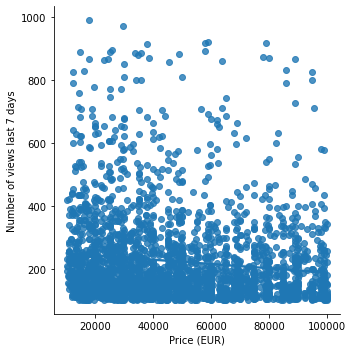

In [5]:
# Scatterplot between Price and number of views

sns.lmplot(x = 'Price (EUR)', y = 'Number of views last 7 days', data = df)

## Hypothesis: When the price of the boats reduce, then they are more pupolar options for sales (number of views increase)

In [6]:
# Preparing for regression analysis by reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['Price (EUR)'].values.reshape(-1,1)
y = df['Number of views last 7 days'].values.reshape(-1,1)

In [7]:
X

array([[10400],
       [11000],
       [11000],
       ...,
       [10400],
       [10300],
       [10200]], dtype=int64)

In [8]:
y

array([[418],
       [256],
       [230],
       ...,
       [230],
       [208],
       [193]], dtype=int64)

In [9]:
#Splitting data into Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Regression Analysis - Creating a regression object

regression = LinearRegression()

In [12]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

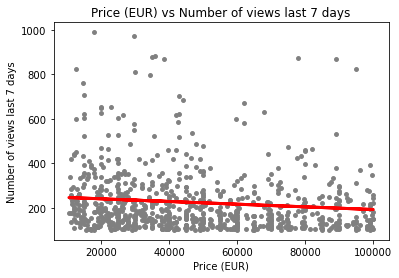

In [14]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price (EUR) vs Number of views last 7 days')
plot_test.xlabel('Price (EUR)')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

In [15]:
# Model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [16]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00060259]]
Mean squared error:  18908.87748267724
R2 score:  0.022427380373371553


### Interpretation

The slope of the line is very low. This could be because majority of the views are upto 300. Views above 300 couls still be possiblly considered outliers disstorting the slope. The nagative slope however confirms that there is a very slight increase in views with a reduction in price.

The MSE is very large signaling a very big gap in the prediction based on actual values

The R2 score further confirms that the Price is not a major factor affecting the number of views and there could potentially be other variables affecting this.

In [17]:
# Dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,177,237.837313
1,135,231.865651
2,178,225.839756
3,128,196.252612
4,168,215.237194
5,353,236.023519
6,225,211.317349
7,160,216.800914
8,221,211.016055
9,169,237.831287


The above numbers also confirm a large variance between the data and prediction numbers. Therefore, the prediction model does not work well and fit here.

## Data bias:

I have filtered the data to my perception of what values are considered outliers. This may be complete different 
in the real world of selling boats. 

I also see a possibility of further extreme values being present in the number of views which if removed, can improve the analysis but modify the source data too much.